# HW 3: Supervised Learning Models
## Name: Jeonseo David Lee (UNI: jl6569)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

### Red Wine Data 

In [2]:
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
red.head()
red.shape

(1599, 12)

## 1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality. If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

### - The values suggest the relative contribution of each feature to the clustering, and each data point in the cluster has been standarized/normalized, which entails transforming every feature in the dataset into a set with a mean of 0 and a standard deviation of 1. Consequently, every value presented from the display function below can be interpreted as the standard deviation by which each data point deviates from the mean of the entire dataset. 

### - With regard to selecting the optimal number of clusters, the silhouette score indicates that two clusters have the maximum silhouette score, followed by the five clusters. Although selecting two clusters seems logical at first glance, verifying the dendogram by employing the two clusters reveals a significant imbalance in dataset of 1597 to 2, which could potentially lead to imprecise outcomes. Consequently, I chose to continue the analysis using the second-highest silhouette score from cluster 5. 

### - By establishing the fixed random state, cluster 1 is able to attain the maximum mean value of 0.832554 for wine quality. In this case, we could determine which characteristics also exhibit positive correlations with wine quality; for instance, alcohol (approximately 1.21), pH (approximately 0.52), sulphates (approximately 0.20), and free sulfur dioxide (approximately 0.18), all of which appear to have a positive impact, could indicate that higher values of these components may contribute to the improved quality of the wine. Conversely, characteristics denoted by negative values such as chlorides (-0.38), volatile acidity (-0.48), and fixed acidity (<-0.6) indicate that an increase in their concentrations might potentially result in a decline in the quality of the wine. 

### - Likewise, cluster 3 could be selected as the cluster exhibiting the lowest quality of wine, denoted by the value -0.465. We could now examine which cluster 3 features have values lower than the entire dataset, indicating that their values may have contributed to the poor quality of the wine. Alcohol (-0.42), citric acid (-0.79), and fixed acidity (-0.48) are these. Conversely, characteristics such as volatile acidity (0.67) and pH (0.40) exhibit conversely high values, which could potentially be a contributing factor to the substandard quality of the wine. 


### - If we want a good bottle of wine, we want to find the features that appear to be high when wine quality is high and appear to be low when wine quality is low. These could be alcohol (1.21 in cluster 1 and -0.42 in cluster 3), sulphate (0.2 in cluster 1 and -0.41 in cluster 3), free sulfur dioxide (0.18 in cluster 1 and -0.4 in cluster 3), and citric acid (-0.1 in cluster 1 and -0.79 in cluster 3).

### Silhouette Score to Find the Optimal Number of Clusters (As mentioned above, I chose five clusters due to huge imbalance in only two clusters)

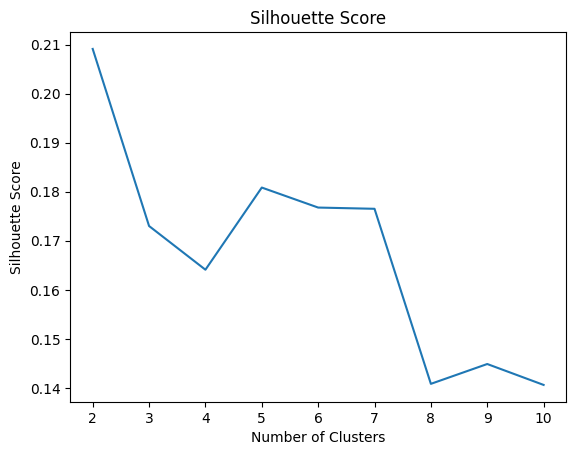

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scale(red))
    silhouette_scores.append(silhouette_score(scale(red), kmeans.labels_))

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [4]:
from sklearn.cluster import KMeans
X = pd.DataFrame(scale(red), index=red.index, columns=red.columns)
km1 = KMeans(n_clusters=5, n_init=20, random_state = 42)
km1.fit_predict(X)

array([3, 3, 3, ..., 1, 3, 1], dtype=int32)

In [5]:
X['cluster'] = km1.labels_

cluster_means = X.groupby('cluster').mean() #cluster means
cluster_means 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.078895,0.085668,0.098161,0.433196,0.037128,1.085767,1.381157,0.384663,-0.156750,-0.184107,-0.618165,-0.463049
1,-0.599699,-0.485038,-0.108176,-0.221834,-0.380796,0.184010,-0.201640,-1.139002,0.528551,0.200265,1.215054,0.832554
2,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695
3,-0.483685,0.675532,-0.791517,-0.231587,-0.078366,-0.401776,-0.384522,-0.095559,0.409664,-0.419668,-0.425757,-0.465275
4,1.367270,-0.674977,1.140048,0.198292,-0.014903,-0.538583,-0.523448,0.833230,-0.841194,0.330386,0.172104,0.402409


### High Values in Cluster 1 (Highest Wine Quality)

In [6]:
high_quality_cluster = cluster_means['quality'].idxmax()
print(f"Cluster with Highest Wine Quality: {high_quality_cluster}")
variables_high_quality = cluster_means.loc[high_quality_cluster].drop('quality').sort_values(ascending=False).head(5)
print(f"Variables with High Values in Cluster {high_quality_cluster} \n{variables_high_quality}")

Cluster with Highest Wine Quality: 1
Variables with High Values in Cluster 1 
alcohol                1.215054
pH                     0.528551
sulphates              0.200265
free sulfur dioxide    0.184010
citric acid           -0.108176
Name: 1, dtype: float64


### Low Values in Cluster 3 (Lowest Wine Quality)

In [7]:
low_quality_cluster = cluster_means['quality'].idxmin()
print(f"Cluster with Lowest Wine Quality: {low_quality_cluster}")
variables_low_quality = cluster_means.loc[low_quality_cluster].drop('quality').sort_values().head(5)
print(f"Variables with High Values in Cluster {low_quality_cluster} \n{variables_low_quality}")

Cluster with Lowest Wine Quality: 3
Variables with High Values in Cluster 3 
citric acid           -0.791517
fixed acidity         -0.483685
alcohol               -0.425757
sulphates             -0.419668
free sulfur dioxide   -0.401776
Name: 3, dtype: float64


## 2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1. Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality. If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

### - In the same manner as the K-Means Clustering with five clusters, the hierarchical cluster analysis has also been implemented with five clusters. Cluster 4 appears to have the highest mean wine quality, with a value of 1.276629. Under this cluster, positive mean values are also observed for the following characteristics: total sulfur dioxide (5.956069), residual sugar (5.293553), free sulfur dioxide (3.167777), citric acid (1.364336), and alcohol (1.136122).

### - On the other hand, cluster 3 exhibits the lowest mean value pertaining to wine quality. Specifically, the following attributes possess the lowest values: pH (-2.663717), alcohol (-0.960246), volatile acidity (-0.350945), residual sugar (0.043416), and fixed acidity (0.074897). 

### - If we want a good bottle of wine, we want to find the features that appear to be high when wine quality is high and appear to be low when wine quality is low. These could be residual sugar (5.293553 in cluster 4 and 0.043416 in cluster 3), fixed acidity (-0.624115 in cluster 4 and 0.074897 in cluster 3), alcohol (1.136122 in cluster 4 and -0.960246 in cluster 3), total sulfur dioxide (5.956069 in cluster 4 and 0.320274 in cluster 3), and free sulfur dioxide (3.167777 in cluster 4 and 0.394484 in cluster 3).

### - The conclusion regarding feature selection has been slightly modified due to the increased significance of residual sugar, which was previously insignificant in K-means Clustering. Nevertheless, the features "Alcohol" and "Free Sulfur Dioxide" continue to hold significance in both K-Means Clustering and Hierarchical Clustering analyses. Nevertheless, due to the fact that clustering methods merely identify patterns in the data and do not establish causal relationships or predictive capabilities, supervised learning models such as classification or regression (e.g., random forest) are required to determine which features ought to be regarded as significant with greater precision. 


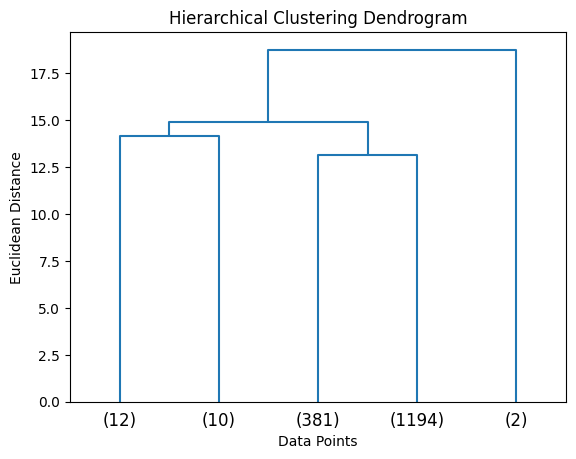

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform 

# 2. Or use input sample matrix
row_clusters = linkage(X.values, method='complete', metric='euclidean')

dendrogram(row_clusters,truncate_mode='lastp', p=5, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()
#the row clusters object is the same as above.

In [22]:
from sklearn.cluster import AgglomerativeClustering
num_clusters = 5

labels = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='complete').fit_predict(scale(X))
X['cluster'] = labels
cluster_means = X.groupby('cluster').mean() #cluster means
cluster_means

/Users/jeonseo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,1.117620,-0.349720,1.004432,-0.095057,1.470947,-0.269898,0.035390,0.800639,-1.292270,1.717645,-0.341875,0.114017
1,-0.088200,0.035595,-0.090699,-0.064045,-0.133744,0.005247,-0.019843,-0.077709,0.111066,-0.140651,0.030863,-0.010170
2,0.284822,-0.598039,0.630946,6.832574,0.639140,0.982981,0.505067,1.903286,-0.500635,0.115332,-0.599218,0.069719
3,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
4,-0.624115,-1.291336,1.364336,5.293553,-0.675866,3.167777,5.956069,-1.185471,-1.259873,-0.815259,1.136122,1.276629


### (For Learning Purpose: Running Classification after Clustering)

In [23]:
# Classifer - for learning purpose

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 

X_train, X_test, y_train, y_test = train_test_split(X.drop('cluster', axis=1), X['cluster'], test_size=0.2, random_state=42)

# Train a classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F-1 Score: {f1:.2f}")


F-1 Score: 0.76


### High Values in Cluster 4 (Highest Wine Quality)

In [24]:
high_quality_cluster = cluster_means['quality'].idxmax()
high_quality_cluster
print(f"Cluster with Highest Wine Quality: {high_quality_cluster}")
variables_high_quality = cluster_means.loc[high_quality_cluster].drop('quality').sort_values(ascending=False).head(7)
print(f"Variables with High Values in Cluster {high_quality_cluster} \n{variables_high_quality}")

Cluster with Highest Wine Quality: 4
Variables with High Values in Cluster 4 
total sulfur dioxide    5.956069
residual sugar          5.293553
free sulfur dioxide     3.167777
citric acid             1.364336
alcohol                 1.136122
fixed acidity          -0.624115
chlorides              -0.675866
Name: 4, dtype: float64


### High Values in Cluster 3 (Lowest Wine Quality)

In [25]:
low_quality_cluster = cluster_means['quality'].idxmin()
print(f"Cluster with Lowest Wine Quality: {low_quality_cluster}")
variables_low_quality = cluster_means.loc[low_quality_cluster].drop('quality').sort_values().head(7)
print(f"Variables with High Values in Cluster {low_quality_cluster} \n{variables_low_quality}")

Cluster with Lowest Wine Quality: 3
Variables with High Values in Cluster 3 
pH                     -2.663717
alcohol                -0.960246
volatile acidity       -0.350945
residual sugar          0.043416
fixed acidity           0.074897
total sulfur dioxide    0.320274
free sulfur dioxide     0.394484
Name: 3, dtype: float64


## 3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

### - The explained variance ratios for the first two principal components obtained using the PCA were approximately 0.26 and 0.18, respectively, indicating that the first principal component accounts for 26% of the variance in the dataset and the second principal component accounts for 18%. Despite the fact that all ten features are still being utilized, it is worth noting that the weight assigned to each feature by each principal component varies. This principle is what gives the data a "reduced dimensionality" by allowing for a more concise representation that preserves the essential information.

### - We can subsequently employ a machine learning model to predict other variables using the first two principal components. The code example could commence by dividing the dataset into training and test sets, and then, depending on the objective variable, employ either a classification or regression supervised learning model. For instance, if the tareget is the wine price, which is typically continous, we can compare the MSE values of various regression models (KNN regressor, Random Forest regressor, etc.) by placing all other features as X.

### - The supervised learning model that incorporates PCA has numerous benefits over the one that does not. To begin with, a more precise and resilient model could be generated through an emphasis on the prevailing patterns. Additionally, PCA decorrelates the data in order to effectively manage collinearity among the features. 

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled= pd.DataFrame(scale(red), index=red.index, columns=red.columns)
X_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("original shape:   ", X_scaled.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1599, 12)
transformed shape: (1599, 2)


### Explained Variance Ratio of the First Two Principal Components


In [15]:
print(pca.explained_variance_ratio_) 

[0.26009731 0.1868235 ]


### PCA Loadings for the First Two Principal Components

In [16]:
X = pd.DataFrame(scale(red), index=red.index, columns=red.columns)
print(pd.DataFrame(pca.components_,columns=X.columns,index = ['PC1','PC2']))

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC1       0.487883         -0.265129     0.473335        0.139154   0.197427   
PC2      -0.004173          0.338968    -0.137358        0.167736   0.189788   

     free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
PC1            -0.045881              0.004067  0.370301 -0.432721   0.254535   
PC2             0.259483              0.363971  0.330781 -0.065440  -0.109334   

      alcohol   quality  
PC1 -0.073177  0.112489  
PC2 -0.502709 -0.473166  
